In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import plot_model
from keras.datasets import mnist

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
print("len of x_train: ", len(x_train), "Len of y_train: ", len(y_train), " len of x_test: ", len(x_test), " len y_test: ", len(y_test))

len of x_train:  60000 Len of y_train:  60000  len of x_test:  10000  len y_test:  10000


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

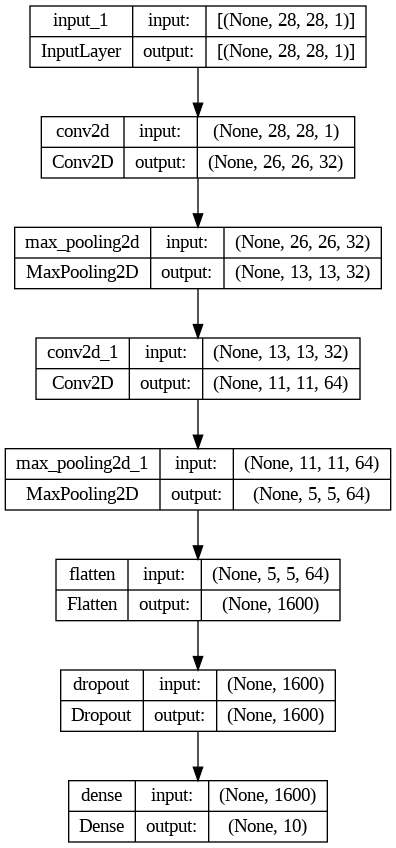

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
epochs=10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 57s 133ms/step - loss: 0.3786 - accuracy: 0.8882 - val_loss: 0.0825 - val_accuracy: 0.9783
Epoch 2/10
422/422 [==============================] - 49s 117ms/step - loss: 0.1133 - accuracy: 0.9661 - val_loss: 0.0569 - val_accuracy: 0.9850
Epoch 3/10
422/422 [==============================] - 50s 117ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0498 - val_accuracy: 0.9865
Epoch 4/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0713 - accuracy: 0.9777 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 5/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0436 - val_accuracy: 0.9885
Epoch 6/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0360 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 51s 120ms/step - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0384 - val_ac

In [ ]:
prediction = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
prediction.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0276 - accuracy: 0.9908


In [ ]:
print(f"Loss of model is on testing data: {loss} and accuracy of model is on testing data: {accuracy}")

Loss of model is on testing data: 0.027647219598293304 and accuracy of model is on testing data: 0.9908000230789185


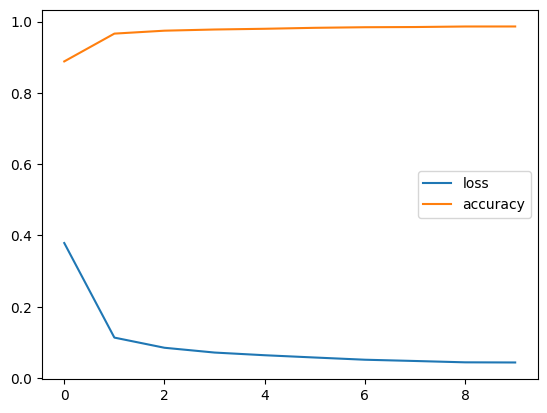

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

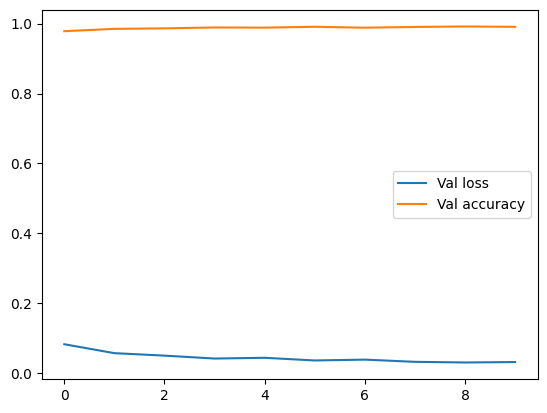

In [ ]:
plt.plot(history.history['val_loss'], label='Val loss')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()